In [2]:
#IMPORTING THE LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

#for feature scaling
from sklearn.ensemble import ExtraTreesClassifier

#for splitting
from sklearn.model_selection import train_test_split

#for classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

#for evaluation
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score

#ensembling
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

In [3]:
#LOADING THE DATASET
profiles_data = pd.read_csv('accounts_dataset.csv')

#Displaying specifications of the dataset
print("Keys of the dataset: \n{}".format(profiles_data.keys()))
print("Datatypes of dataset: \n{}".format(profiles_data.dtypes))
print("Count of the dataset: \n{}".format(profiles_data.count()))

Keys of the dataset: 
Index(['profile pic', 'nums/length username', 'fullname words',
       'nums/length fullname', 'name==username', 'description length',
       'external URL', 'private', '#posts', '#followers', '#follows', 'fake'],
      dtype='object')
Datatypes of dataset: 
profile pic               int64
nums/length username    float64
fullname words            int64
nums/length fullname    float64
name==username            int64
description length        int64
external URL              int64
private                   int64
#posts                    int64
#followers                int64
#follows                  int64
fake                      int64
dtype: object
Count of the dataset: 
profile pic             696
nums/length username    696
fullname words          696
nums/length fullname    696
name==username          696
description length      696
external URL            696
private                 696
#posts                  696
#followers              696
#follows          

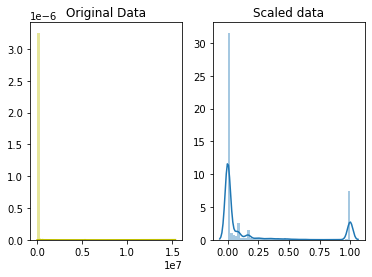

In [4]:
#FEATURE SCALING USING NORMALIZATION
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

mn = MinMaxScaler()
scaled_data = mn.fit_transform(profiles_data)
scaled_data = pd.DataFrame(scaled_data, columns = profiles_data.columns)

#COMPARING ORIGINAL AND SCALED DATA
fig, ax = plt.subplots(1,2)
sns.distplot(profiles_data, ax = ax[0], color='y')
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")
plt.show()

[0.29286796 0.21073985 0.06186022 0.02637599 0.01349904 0.12782484
 0.05376969 0.01838946 0.0944753  0.10019765]


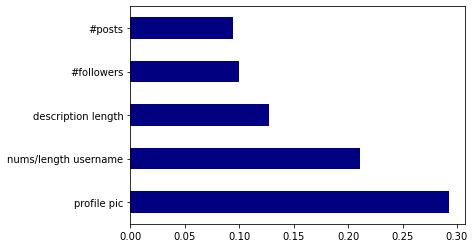

In [5]:
#FEATURE SELECTION VIA ExtraTreesClassifier
x = scaled_data.iloc[:,0:10]
y = scaled_data.iloc[:,-1]
fs = ExtraTreesClassifier()
fs.fit(x,y)
print(fs.feature_importances_) 

#DISPLAYING GRAPH OF FEATURE IMPORTANCE
feat_importances = pd.Series(fs.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh', color = 'navy')
plt.show()

In [6]:
#CREATING NEW DATASET WITH THE BEST FEATURES
#dropping features with small values
new_data = scaled_data.drop(['fullname words' , 'nums/length fullname' , 'name==username', 'private', '#follows', 'external URL' ], axis = 1)

X = new_data.iloc[:,0:5]
y = new_data.fake

In [7]:
#DATA SPLITTING


#test_size =0.2 splits the data into 80% train and 20% test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

#DISPLAY SPLIT DATA
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (556, 5)
y_train shape: (556,)
X_test shape: (140, 5)
y_test shape: (140,)


In [8]:
#CLASSIFICATION VIA KNN
#Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Cross Validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

acc = cross_val_score(knn, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
pre = cross_val_score(knn, X, y, scoring='precision', cv=cv, n_jobs=-1)
rec = cross_val_score(knn, X, y, scoring='recall', cv=cv, n_jobs=-1)
f1 = cross_val_score(knn, X, y, scoring='f1', cv=cv, n_jobs=-1)

print("Accuracy:    {:.2f}%".format(acc.mean()*100))
print("Precision:  {:.2f}%".format(pre.mean()*100))
print("Recall:      {:.2f}%".format(rec.mean()*100))
print("F1 - score:  {:.2f}%".format(f1.mean()*100))

Accuracy:    86.78%
Precision:  87.92%
Recall:      85.82%
F1 - score:  86.65%


In [10]:
#CLASSIFICATION VIA SVM
from sklearn.svm import SVC
#Create SVM Classifier
svm = SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
svm.fit(X_train, y_train)

#Cross Validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

acc = cross_val_score(svm, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
pre = cross_val_score(svm, X, y, scoring='precision', cv=cv, n_jobs=-1)
rec = cross_val_score(svm, X, y, scoring='recall', cv=cv, n_jobs=-1)
f1 = cross_val_score(svm, X, y, scoring='f1', cv=cv, n_jobs=-1)

print("Accuracy:    {:.2f}%".format(acc.mean()*100))
print("Precision:  {:.2f}%".format(pre.mean()*100))
print("Recall:      {:.2f}%".format(rec.mean()*100))
print("F1 - score:  {:.2f}%".format(f1.mean()*100))

Accuracy:    89.04%
Precision:  93.43%
Recall:      84.20%
F1 - score:  88.43%


In [11]:
#CLASSIFICATION VIA Gaussian NB
#Create a NB Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Cross Validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

acc = cross_val_score(gnb, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
pre = cross_val_score(gnb, X, y, scoring='precision', cv=cv, n_jobs=-1)
rec = cross_val_score(gnb, X, y, scoring='recall', cv=cv, n_jobs=-1)
f1 = cross_val_score(gnb, X, y, scoring='f1', cv=cv, n_jobs=-1)

print("Accuracy:    {:.2f}%".format(acc.mean()*100))
print("Precision:  {:.2f}%".format(pre.mean()*100))
print("Recall:      {:.2f}%".format(rec.mean()*100))
print("F1 - score:  {:.2f}%".format(f1.mean()*100))

Accuracy:    74.86%
Precision:  67.41%
Recall:      97.32%
F1 - score:  79.55%


In [12]:
# via STACKING
# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('lr', LogisticRegression()))
	level0.append(('knn', KNeighborsClassifier()))
	level0.append(('cart', DecisionTreeClassifier()))
	level0.append(('svm', SVC()))
	level0.append(('bayes', GaussianNB()))
	# define meta learner model
	level1 = LogisticRegression()
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=10)
	return model

# get a list of models to evaluate
def get_models():
	models = dict()
	models['lr'] = LogisticRegression()
	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	models['bayes'] = GaussianNB()
	models['stacking'] = get_stacking()
	return models

# get the models to evaluate
models = get_models()
# evaluate the models and store results
acc, names = list(), list()
for name, model in models.items():
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)    
	accuracy_score = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	acc.append(accuracy_score)
	names.append(name)
	precision_score = cross_val_score(model, X, y, scoring='precision', cv=cv, n_jobs=-1)
	recall_score = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1)
	f1_score = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1)

	print('>%s %.2f (%.2f)' % (name, mean(accuracy_score)*100, std(accuracy_score)), 'Accuracy')
	print('>%s %.2f (%.2f)' % (name, mean(precision_score)*100, std(precision_score)), 'Precision') 
	print('>%s %.2f (%.2f)' % (name, mean(recall_score)*100, std(recall_score)), 'Recall')   
	print('>%s %.2f (%.2f)' % (name, mean(f1_score)*100, std(f1_score)), 'F1')

>lr 89.23 (0.04) Accuracy
>lr 94.20 (0.04) Precision
>lr 83.72 (0.06) Recall
>lr 88.52 (0.04) F1
>knn 86.78 (0.03) Accuracy
>knn 87.92 (0.05) Precision
>knn 85.82 (0.05) Recall
>knn 86.65 (0.03) F1
>cart 87.41 (0.04) Accuracy
>cart 87.01 (0.05) Precision
>cart 87.83 (0.05) Recall
>cart 87.53 (0.04) F1
>svm 89.23 (0.04) Accuracy
>svm 93.03 (0.05) Precision
>svm 85.06 (0.06) Recall
>svm 88.71 (0.04) F1
>bayes 74.86 (0.04) Accuracy
>bayes 67.41 (0.04) Precision
>bayes 97.32 (0.03) Recall
>bayes 79.55 (0.02) F1
>stacking 89.61 (0.04) Accuracy
>stacking 91.76 (0.05) Precision
>stacking 87.26 (0.05) Recall
>stacking 89.22 (0.03) F1


In [13]:
#via BOOSTING
# evaluate gradient boosting algorithm for classification
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier

# define the model
model = GradientBoostingClassifier()
# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model on the dataset
acc = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
pre = cross_val_score(model, X, y, scoring='precision', cv=cv, n_jobs=-1)
rec = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1)
f1 = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1)

# report performance
print("Accuracy:    {:.2f}%".format(acc.mean()*100))
print("Precission:  {:.2f}%".format(pre.mean()*100))
print("Recall:      {:.2f}%".format(rec.mean()*100))
print("F1 - score:  {:.2f}%".format(f1.mean()*100))


Accuracy:    91.52%
Precission:  92.21%
Recall:      90.90%
F1 - score:  91.41%


In [14]:
#via BAGGING
from sklearn.ensemble import BaggingClassifier
# get a list of models to evaluate
def get_models():
	models = dict()
	# define number of trees to consider
	n_trees = [10, 50, 100, 500, 1000, 5000] 
	for n in n_trees:
		models[str(n)] = BaggingClassifier(n_estimators=n)
	return models
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
for name, model in models.items():
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)    
	accuracy_score = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	precision_score = cross_val_score(model, X, y, scoring='precision', cv=cv, n_jobs=-1)
	recall_score = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1)
	f1_score = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1)

	print('>%s %.2f (%.2f)' % (name, mean(accuracy_score)*100, std(accuracy_score)), 'Accuracy')
	print('>%s %.2f (%.2f)' % (name, mean(precision_score)*100, std(precision_score)), 'Precision') 
	print('>%s %.2f (%.2f)' % (name, mean(recall_score)*100, std(recall_score)), 'Recall')   
	print('>%s %.2f (%.2f)' % (name, mean(f1_score)*100, std(f1_score)), 'F1')    

>10 90.18 (0.03) Accuracy
>10 91.28 (0.05) Precision
>10 88.79 (0.05) Recall
>10 90.53 (0.03) F1
>50 90.71 (0.03) Accuracy
>50 91.12 (0.05) Precision
>50 89.94 (0.04) Recall
>50 90.23 (0.03) F1
>100 90.57 (0.03) Accuracy
>100 90.85 (0.05) Precision
>100 90.51 (0.04) Recall
>100 90.29 (0.03) F1
>500 90.57 (0.03) Accuracy
>500 91.07 (0.05) Precision
>500 90.51 (0.04) Recall
>500 90.77 (0.03) F1
>1000 90.56 (0.03) Accuracy
>1000 91.11 (0.05) Precision
>1000 90.61 (0.04) Recall
>1000 90.84 (0.03) F1
>5000 90.80 (0.03) Accuracy
>5000 91.34 (0.05) Precision
>5000 90.80 (0.04) Recall
>5000 90.74 (0.03) F1
